# Exercise 4 - Ensemble of Batman trees
## Imports

In [56]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import os
print("Current working directory:", os.getcwd(), sep="\n")

# So that changes to the a3 model are reflected here.
import a3
import importlib
importlib.reload(a3)
import a3


Current working directory:
/Users/atakancoban/Desktop/School/2dv506 - Machine learning/Assignment 3/supervised-learning-algorithms/Lecture_9


## Functions

In [57]:
def nonce():
    pass

## Part 1 - Prepare datasets

In [58]:
# Load bm.csv.
data = np.loadtxt("datasets/bm.csv", delimiter=',')
np.random.shuffle(data)
X_train, y_train = data[:5000, 0:2], data[:5000, 2]
X_test, y_test = data[5000:, 0:2], data[5000:, 2]

# Bootstrap 100 unique datasets.
rng = np.random.default_rng()

n = 5000
XX = np.zeros([n, 2, 100])
yy = np.zeros([n, 100], dtype=int)

for i in range(100):
    idxs = rng.choice(n, size=n, replace=True)
    XX[:, :, i] = X_train[idxs, :]
    yy[:, i] = y_train[idxs]

## Part 2 - Train model and calculate performance

In [59]:
# Train model.
clfs = []
for i in range(100):
    clfs.append(DecisionTreeClassifier().fit(XX[:,:,i], yy[:,i]))

# Evaluation.
def test_accuracy(X_test, y_test, y_test_pred):
    y_diff = y_test - y_test_pred
    y_diff = (y_diff**2)**0.5
    error_count = np.sum(y_diff)
    return (X_test.shape[0] - error_count) / X_test.shape[0]

# Ensemble accuracy.
y_test_pred = a3.ensemble_predict_binary(clfs, X_test)
accuracy = round(test_accuracy(X_test, y_test, y_test_pred)*100, 2)
print(f"Ensemble accuracy: {accuracy}%")

# Average individual decision tree accuracy.
total = 0
for clf in clfs:
    y_test_pred = clf.predict(X_test)
    total += test_accuracy(X_test, y_test, y_test_pred)
accuracy = round((total/len(clfs))*100, 2)
print(f"Average individual decision tree accuracy: {accuracy}%")

Ensemble accuracy: 97.64%
Average individual decision tree accuracy: 96.36%


## Part 3 - Prepare decision boundaries for individual classifiers

In [60]:
# Prepare meshgrid.
boundaries = []
x_min, x_max, x_step = -9, 9, 0.05
y_min, y_max, y_step = -5, 5, 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))

# Flatten and collect in one array for vectorized prediction.
X = np.zeros((xx.size, 2))
X[:, 0] = np.ravel(xx)
X[:, 1] = np.ravel(yy)

# Prepare decision boundaries.
print("Calculating for classifier 0-99...")
for clf_idx in range(100):
    if clf_idx % 10 == 0:
        print()
    if clf_idx < 10:
        print("", clf_idx, end=", ")
    else:
        print(clf_idx, end=", ")

    # Predict for each point in meshgrid and save boundary points.
    zz = clfs[clf_idx].predict(X)
    boundaries.append(zz.reshape(xx.shape))

print("\n\nDone!")

Calculating for classifier 0-99...

 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 
10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 
40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 
50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 
60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 
70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 
80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 
90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

Done!


## Part 4 - Plot decision boundaries for individual classifiers

Plotting classifiers 0-99...

 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 
10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 
40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 
50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 
60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 
70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 
80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 
90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

Done!


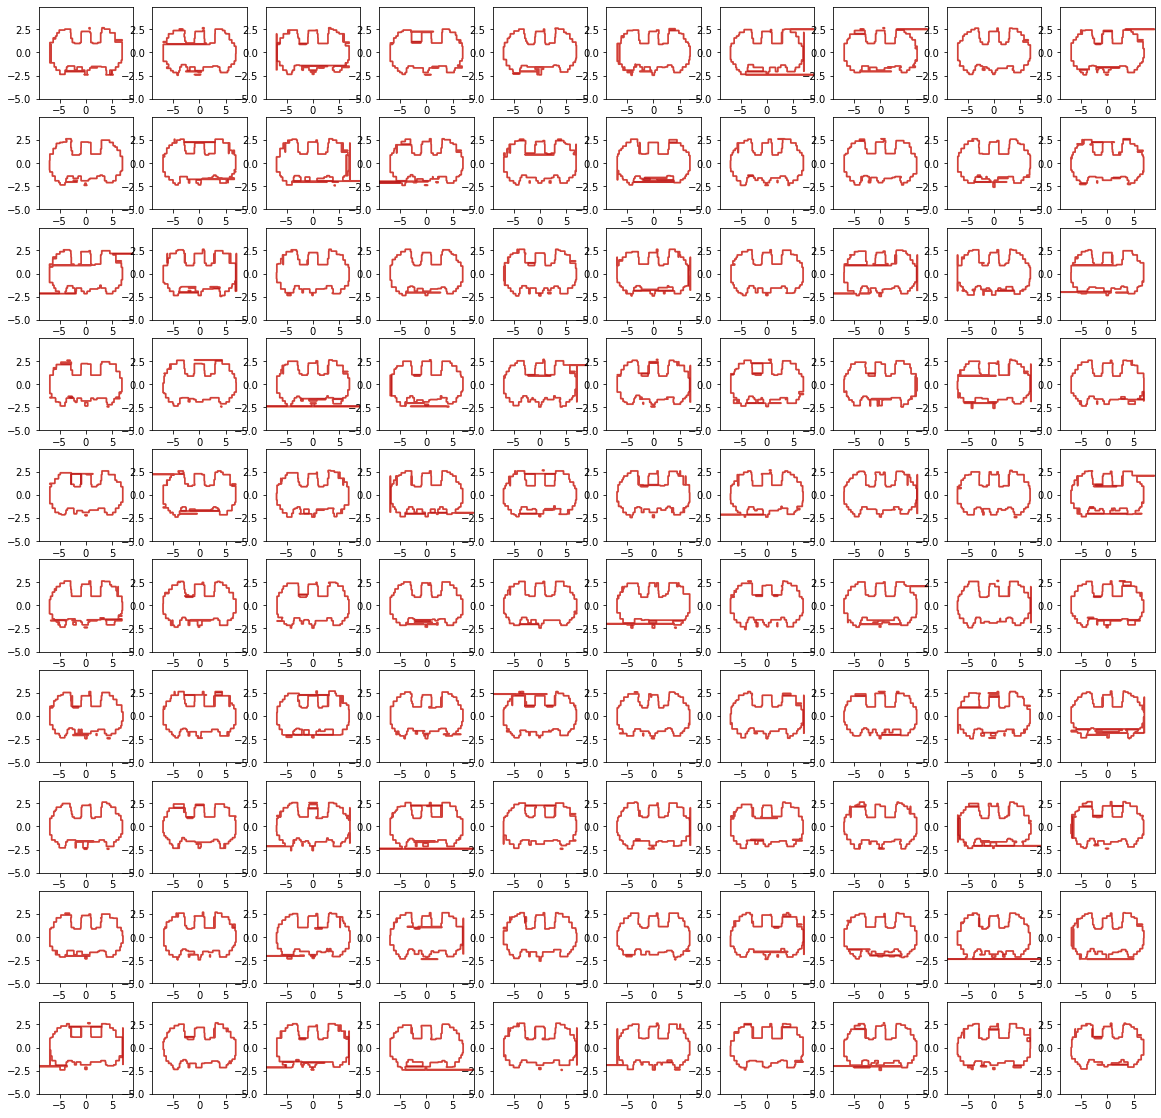

In [61]:
fig = plt.figure(figsize=(20,20))

# Plot for each classifier.
print("Plotting classifiers 0-99...")
for i in range(100):
    if i % 10 == 0:
        print()
    if i < 10:
        print("", i, end=", ")
    else:
        print(i, end=", ")

    zz = boundaries[i]
    ax = fig.add_subplot(10, 10, i+1)
    ax.contour(xx, yy, zz, alpha=0.4, cmap="Reds")

print("\n\nDone!")

## Part 5 - Prepare and plot decision boundaries for the ensemble

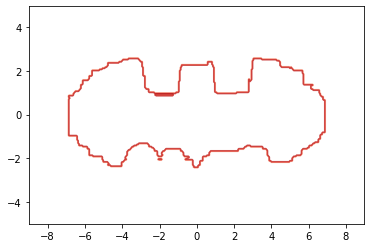

In [62]:
# Predict for each point in meshgrid.
zz = a3.ensemble_predict_binary(clfs, X)
zz = zz.reshape(xx.shape)

# Plot decision boundaries.
plt.contour(xx, yy, zz, alpha=0.4, cmap="Reds");

## Part 6 - Evaluation

A brief note before the evaluation would be to acknowledge that the results tend to vary with each run of the notebook.

This is because the bootstrapping is re-done each time. As for the current state of the results, the ensemble is
expectedly better than the average decision tree made with the sklearn default parameters.

Looking at a random decision tree from the collection, you are likely to see random horizontal or vertical lines that disrupt
the batman logo, therefore, hindering the accuracy of the predictions it makes. Although, this doesn't appear to be the
case for every decision tree.

There does exist some which do not have random disruptive lines and are instead fairly similar to the ensemble. The
current test results comparing the average accuracy of an individual tree versus the ensemble indicate that they are
quite close percentage-wise, with the ensemble at **97.5%** and the decision tree average at **96.35%**.

While they are both quite accurate, a 1.15% difference at that level of accuracy still means nearly 50% less errors for
the ensemble.


